In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup
os.chdir("..")
plt.style.use("ggplot")

%matplotlib inline

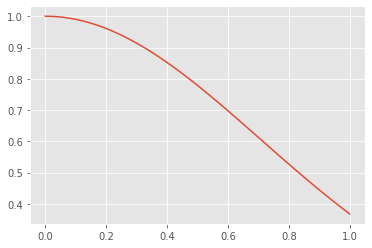

In [3]:
def f(x):
    return np.exp(-x**2)

t = np.linspace(0,1,100)
y = f(t)
plt.plot(t,y)

In [4]:
from gp.kernels import RBF
from gp.models import GPRegressor

In [5]:
ker = RBF(input_dim=1, l=1, sigma=1)
gpr = GPRegressor(input_dim=1, kernel_function=ker)
gpr._param

{'log_l': 0.0, 'log_sigma': 0.0, 'log_noise': -23.025850929940457}

In [6]:
x = np.linspace(0,1,2)
yt = f(x)

gpr.fit(x[:,None],yt)
print(gpr._loglik, gpr._grad)

-2.153589764120121 {'log_l': 0.30055030001692656, 'log_sigma': -0.9098994593566618, 'log_noise': -1.5110000593905136e-20}


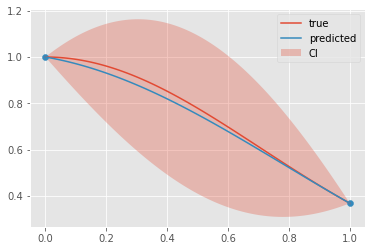

In [7]:
yp, std = gpr.predict(t[:,None], return_std=True)
plt.plot(t,y,label="true")
plt.plot(t,yp,label="predicted")
plt.fill_between(
    t,
    yp-1.96*std,
    yp+1.96*std,
    alpha=0.3,
    label="CI"
)
plt.scatter(x,yt)
plt.legend()

In [14]:
sample_size = 5
ys = gpr.sample(t[:, None], size=sample_size)

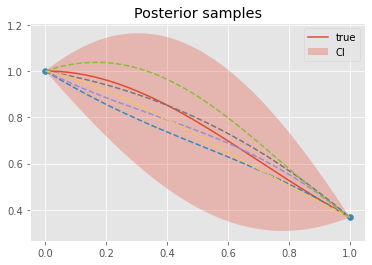

In [16]:
plt.plot(t,y,label="true")
for k in range(sample_size):
    plt.plot(t, ys[k, :], '--')
plt.fill_between(
    t,
    yp-1.96*std,
    yp+1.96*std,
    alpha=0.3,
    label="CI"
)
plt.scatter(x,yt)
plt.title('Posterior samples')
plt.legend()